# **Linear Regression**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn import datasets
from sklearn import linear_model
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LinearRegression

In [ ]:
# Load dataset
bostonData = fetch_openml(name='boston', version=1, as_frame=False)
yb = bostonData.target.reshape(-1, 1)
Xb = bostonData['data'][:,5].reshape(-1, 1)

In [ ]:
# Plot the variables
plt.scatter(Xb,yb)
plt.ylabel('value of house /1000 ($)')
plt.xlabel('number of rooms')
plt.show()

In [ ]:
# Create the model
regr = linear_model.LinearRegression()
regr.fit(Xb, yb)

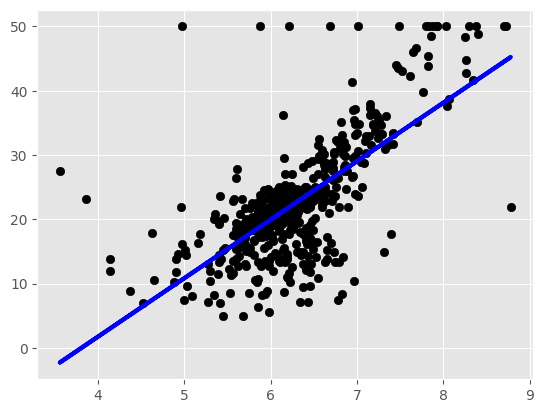

In [ ]:
# Generate plots
plt.scatter(Xb, yb, color='black')
plt.plot(Xb, regr.predict(Xb), color='blue', linewidth=3)
plt.show()

# **Logistic Regression**

In [ ]:
X1 = np.random.normal(size=150)
y1 = (X1 > 0).astype(float)
X1[X1 > 0] *= 4
X1 += .3 * np.random.normal(size=150)
X1 = X1.reshape(-1, 1)

In [ ]:
# Plot data
plt.scatter(X1,y1)
plt.ylabel('y1')
plt.xlabel('X1')
plt.show()

In [ ]:
# Run the logistic regression analysis
lm_log = linear_model.LogisticRegression()
lm_log.fit(X1, y1)

Text(0.5, 0, 'predictor variable')

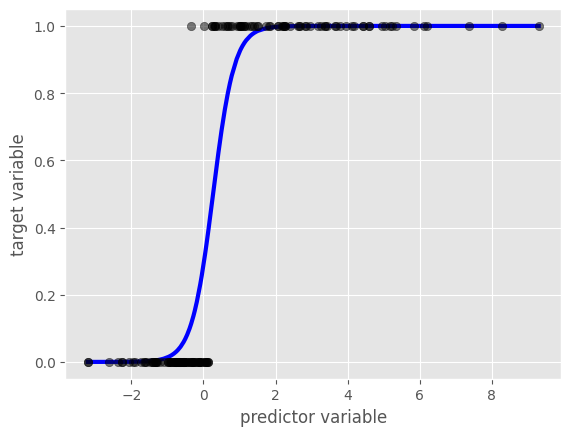

In [ ]:
# Plot the model
X1_ordered = np.sort(X1, axis=0)
plt.scatter(X1.ravel(), y1, color='black', zorder=20 , alpha = 0.5)
plt.plot(X1_ordered, lm_log.predict_proba(X1_ordered)[:,1], color='blue', linewidth = 3)
plt.ylabel('target variable')
plt.xlabel('predictor variable')

# **Quantile Regression**

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
# generate a random dataset with two variables
df = pd.DataFrame(np.random.normal(0, 1, (100, 2)))
df.columns = ['x', 'y']

In [ ]:
# develop a linear regression model (for comparison)
x = df['x']
y = df['y']
fit = np.polyfit(x, y, deg=1)
_x = np.linspace(x.min(), x.max(), num=len(y))

In [ ]:
# develop the quantile regression model for six quantiles
model = smf.quantreg('y ~ x', df)
quantiles = [0.05, 0.1, 0.25, 0.5, 0.75, 0.95]
fits = [model.fit(q=q) for q in quantiles]

In [ ]:
# the quantile lines
_y_005 = fits[0].params['x'] * _x + fits[0].params['Intercept']
_y_095 = fits[5].params['x'] * _x + fits[5].params['Intercept']

In [ ]:
p = np.column_stack((x, y))
a = np.array([_x[0], _y_005[0]]) #first point of 0.05 quantile fit line
b = np.array([_x[-1], _y_005[-1]]) #last point of 0.05 quantile fit line
a_ = np.array([_x[0], _y_095[0]])
b_ = np.array([_x[-1], _y_095[-1]])

In [ ]:
#mask for coordinates above 0.95 or below 0.05 quantile lines
mask = lambda p, a, b, a_, b_: (np.cross(p-a, b-a) > 0) | (np.cross(p-a_, b_-a_) < 0)
mask = mask(p, a, b, a_, b_)

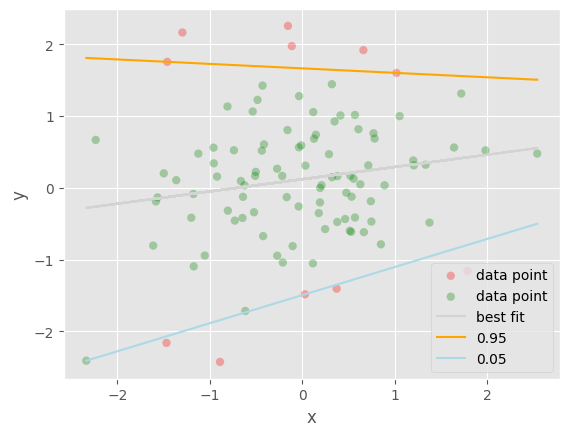

In [ ]:
# generate the plots
figure, axes = plt.subplots()
axes.scatter(x[mask], df['y'][mask], facecolor='r', edgecolor='none', alpha=0.3, label='data point')
axes.scatter(x[~mask], df['y'][~mask], facecolor='g', edgecolor='none', alpha=0.3, label='data point')
axes.plot(x, fit[0] * x + fit[1], label='best fit', c='lightgrey')
axes.plot(_x, _y_095, label=quantiles[5], c='orange')
axes.plot(_x, _y_005, label=quantiles[0], c='lightblue')
axes.legend()
axes.set_xlabel('x')
axes.set_ylabel('y')
plt.show()

# **Ridge and Lasso**

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from statistics import mean

In [ ]:
# Loading the data
boston_housing = fetch_openml(name='boston', version=1, as_frame=True)
data = boston_housing.frame

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
# Drop the non-numerical variables and those with missing values
# dropColumns = ['id', 'date', 'sqft_above', 'zipcode']
# data = data.drop(dropColumns, axis = 1)

In [ ]:
# Determine the dependent and independent variables
y = data['MEDV']
X = data.drop('MEDV', axis = 1)

In [ ]:
# Divide the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

#X_train = X_train.values
#X_test = X_test.values
#y_train = y_train.values
#y_test = y_test.values

In [ ]:
# Develop a Linear Regression model
linearModel = LinearRegression()
linearModel.fit(X_train.values, y_train.values)

LinearRegression()

In [ ]:
# Evaluate the Linear Regression model
print(linearModel.score(X_test.values, y_test.values))

0.6929154618425177


In [ ]:
# Develop Ridge(L2) Regression Model:
# Estimate different values for lamda
alpha = []
cross_val_scores_ridge = []

In [ ]:
# Loop to compute the different scores
X = X.to_numpy()
y = y.to_numpy()

for i in range(1, 9):
  ridgeModel = Ridge(alpha = i * 0.25)
  ridgeModel.fit(X_train, y_train)
  scores = cross_val_score(ridgeModel, X, y, cv = 10)
  avg_cross_val_score = mean(scores)
  cross_val_scores_ridge.append(avg_cross_val_score)
  alpha.append(i * 0.25)

In [ ]:
# Loop to print the different scores
for i in range(0, len(alpha)):
  print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i]))

In [ ]:
# the best value of lamda for the data is 2
# Build the Ridge Regression model for the best lamda
ridgeModelChosen = Ridge(alpha = 2)
ridgeModelChosen.fit(X_train.values, y_train.values)
# Evaluate the Ridge Regression model
print(ridgeModelChosen.score(X_test.values, y_test.values))

0.6815908666568353


In [ ]:
# Develop Lasso(L1) Regression Model:
# Estimate different values for lamda
lamda = []
cross_val_scores_lasso = []

In [ ]:
# Loop to compute the different scores
for i in range(1, 9):
  lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925)
  lassoModel.fit(X_train, y_train)
  scores = cross_val_score(lassoModel, X, y, cv = 10)
  avg_cross_val_score = mean(scores)
  cross_val_scores_lasso.append(avg_cross_val_score)
  lamda.append(i * 0.25)

In [ ]:
# Loop to print the different scores
for i in range(0, len(lamda)):
  print(str(lamda[i])+' : '+str(cross_val_scores_lasso[i]))

0.25 : 0.2760882846427929
0.5 : 0.26772411610206714
0.75 : 0.24020533308874747
1.0 : 0.18765254814737858
1.25 : 0.13877012809558348
1.5 : 0.11380349361635608
1.75 : 0.09106554534743502
2.0 : 0.07027656235880478


In [ ]:
# the best value of lamda for the data is 2
# Build the Lasso Regression model for the best lamda
lassoModelChosen = Lasso(alpha = 0, tol = 0.0925)
lassoModelChosen.fit(X_train, y_train)

<ipython-input-105-68f3d17485e7>:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lassoModelChosen.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.071e+03, tolerance: 3.034e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0, tol=0.0925)

In [ ]:
# Evaluate the Lasso Regression model
print(lassoModelChosen.score(X_test.values, y_test.values))

0.6929154618425162


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
